In [1]:
from flood import FloodFill
import numpy as np
import time 
from tqdm import trange 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Load in data 
adj =  np.genfromtxt('adj.csv', delimiter=',',dtype=np.int32)
data = np.genfromtxt('data.csv', delimiter=',')

In [3]:
# Instantiate FloodFill and recording variables
spk_detector = FloodFill(data, adj)
N = 100 
times = []

In [4]:
# Profile detect_spikes
"""
for i in (t := trange(N)):
    start = time.time()
    spk_detector.detect_spikes()
    end = time.time()
    times.append(end-start)
    t.set_description("Time took %f" % (end-start) )
plt.plot(times)
plt.show()

# Saving timing data 
np.savetxt("times_from_spkdetect_better_cross_detect.csv", np.asarray(times), delimiter=',')
"""

'\nfor i in (t := trange(N)):\n    start = time.time()\n    spk_detector.detect_spikes()\n    end = time.time()\n    times.append(end-start)\n    t.set_description("Time took %f" % (end-start) )\nplt.plot(times)\nplt.show()\n\n# Saving timing data \nnp.savetxt("times_from_spkdetect_better_cross_detect.csv", np.asarray(times), delimiter=\',\')\n'

In [5]:
spks = spk_detector.detect_spikes()
weak, strong = spk_detector.weak, spk_detector.strong 

/home/samir/repos/floodfill/rewrite/env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<class 'numpy.ndarray'>


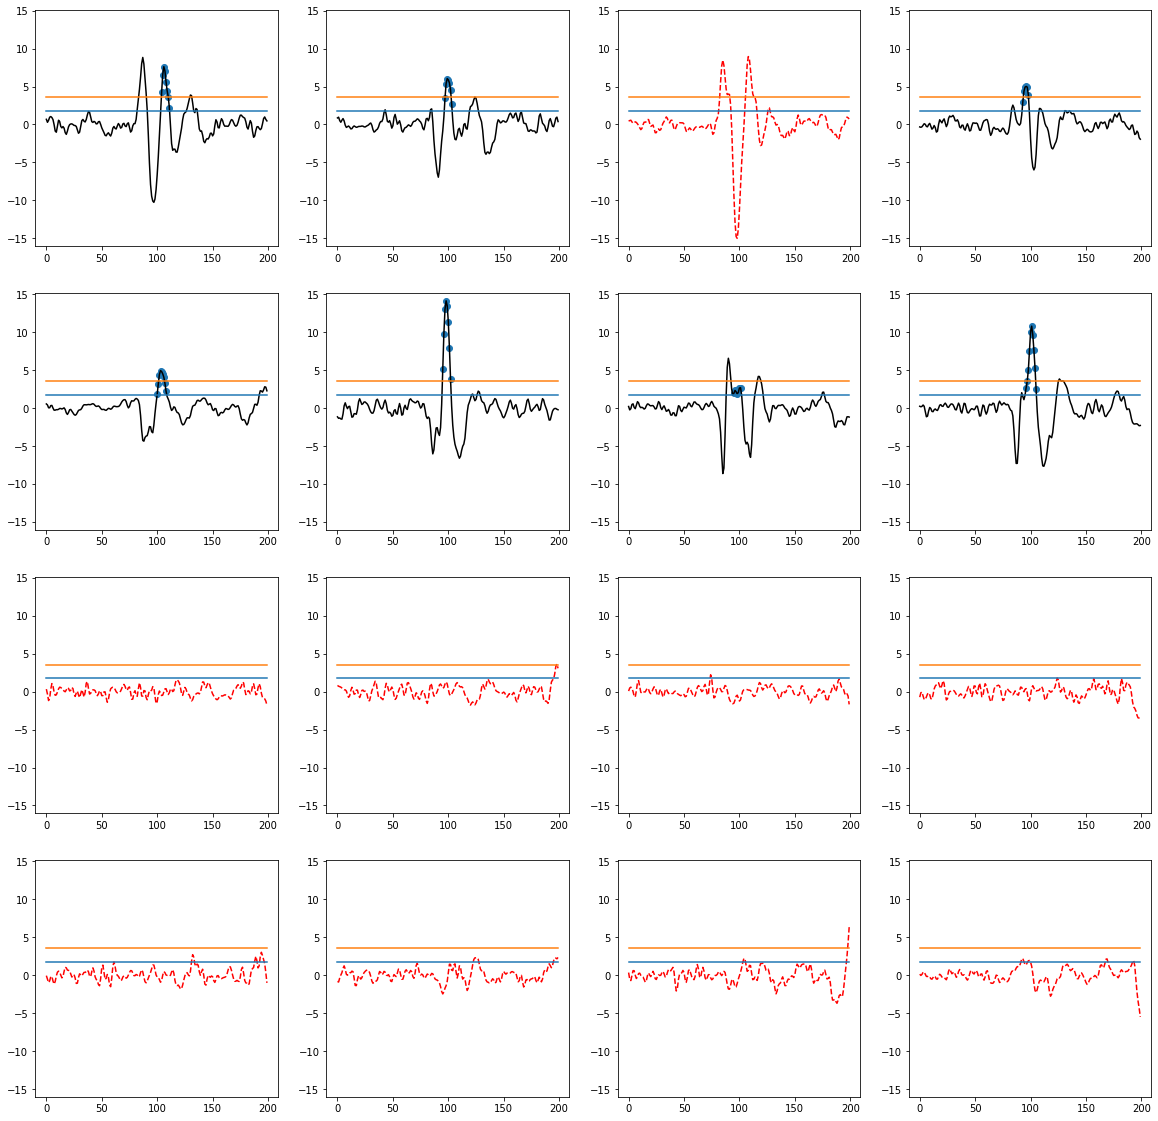

In [6]:
# Create a 4 x 4 map, Each grid cell 10 ms window around that spike
# Plot all 16 channels, channels that have a spike are black, channels that don't are (blue) 

def spkData(data, spk):
    # Setting up input
    spkTime, spkLocs = spk 
    chanFound = spkLocs[0][1]
    spkTime = int(spkTime)
    spkChans = set([x[1] for x in spkLocs])

    # Setting up grid 
    fig, axs = plt.subplots(4,4)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    
    # Loop variables 
    count, minY, maxY = 0, float('inf'), -float('inf') 
    
    # Looping through all the channels 
    for i in range(4):
        for j in range(4):
            # Black or Red if spiking or not 
            if count in spkChans:
                axs[i][j].plot(data[count][spkTime-100:spkTime+100],'k')
            else: 
                axs[i][j].plot(data[count][spkTime-100:spkTime+100],'r--')
            
            # Plotting detected points 
            detected_points = spkLocs[np.where(count == spkLocs[:,1])][:,0]
            detected_data = data[count][detected_points]
            adjusted_xVals = detected_points - spkTime + 100 
            axs[i][j].scatter(adjusted_xVals, detected_data)
            #print("CHANNEL {}: ".format(count), detected_points - spkTime + 100)
            
            # Plotting thresholds 
            axs[i][j].plot(np.arange(200), [weak]*200)
            axs[i][j].plot(np.arange(200), [strong]*200)
            
            # Updating min/max Y vals to keep uniform scale 
            minY = min(min(data[count][spkTime-100:spkTime+100]),minY)
            maxY = max(max(data[count][spkTime-100:spkTime+100]),maxY)
            count+=1
     
    # Updating Y scale 
    for i in range(4):
        for j in range(4):
            axs[i][j].set_ylim((minY-1, maxY+1))
    plt.savefig('random spike') 
N = 3
spkData(data.transpose(), (spks[0][N],spks[1][N]))
print(type(spks[1][N]))

In [7]:
i = 0 
bruh = spks[1][2]
bruh[np.where(i == bruh[:,1])]

array([[7538,    0],
       [7539,    0],
       [7540,    0],
       [7541,    0],
       [7542,    0],
       [7543,    0],
       [7544,    0],
       [7545,    0],
       [7537,    0],
       [7536,    0]])

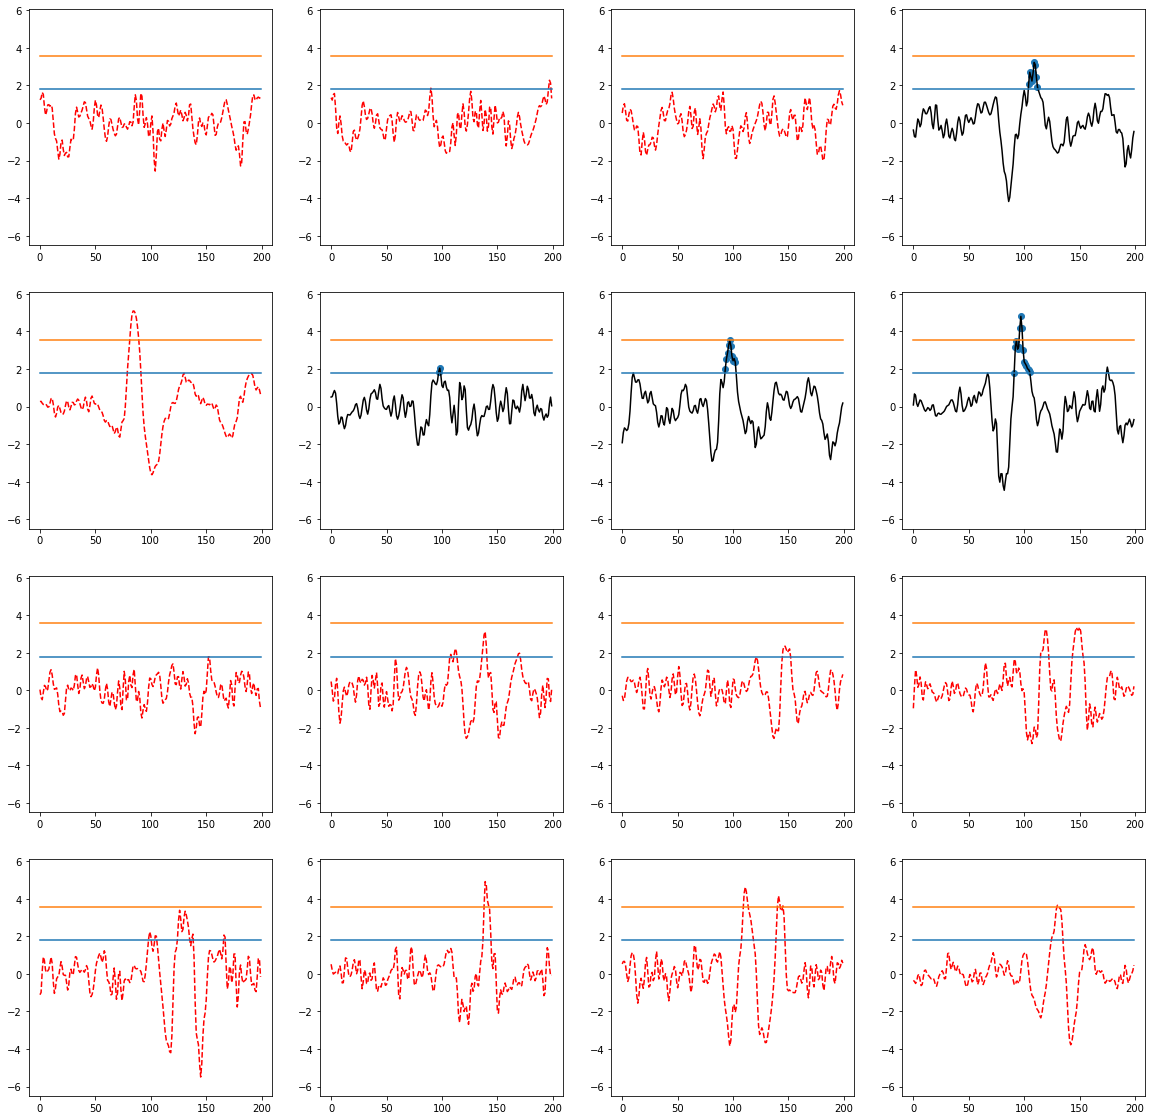

In [13]:
spk_detector.plotSpk(2200)